#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Ejercicios Complementarios Semana 09**


#**Uso de modelos Transformer pre-entrenados de HuggingFace basados en BERT**

Recuerda que existe una gran variedad de modelos pre-entrenados para diferentes tipos de tareas, por lo que no dejes de consultar la página y documentación correspondiente.

https://huggingface.co/

https://github.com/huggingface/transformers/

https://huggingface.co/docs/transformers/main/index

https://huggingface.co/transformers/v3.3.1/pretrained_models.html



Como estarás viendo, muchas de las soluciones están en TensorFlow o PyTorch. Por el momento estaremos usando dichas librerías para la impelentación de los ejercicios, por lo que es sifuciente con que sepas que aquellos que usen PyTorch solamente deberemos cuidar que el tipo de dato sea de este tipo, pero el manejo de las funciones mediante HF lo hace bastante transparente para nosotros.

Obviamente se puede enriquecer mucho un problema si tienes conocimientos de TensorFlow o PyTorch y aquellos interesados pueden abordar con mayor profundidad un problema.

In [ ]:
# pip install tensorflow-cpu==2.16.1
# pip install tf-keras==2.16.0 --no-dependencies

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 435.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.7 MB 744.7 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.7 MB 1.3 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.7 MB 1.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 2.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.7 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import tensorflow as tf
import numpy as np

Los modelos tipo SQuAD están basados en la base de datos de pregunatas y respuestas diseñada por la Universidad de Stanford.

In [25]:
from transformers import TFBertForQuestionAnswering

model = TFBertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


c:\Users\hille\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hille\.cache\huggingface\hub\models--bert-large-uncased-whole-word-masking-finetuned-squad. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' packag

All PyTorch model weights were used when initializing TFBertForQuestionAnswering.

All the weights of TFBertForQuestionAnswering were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForQuestionAnswering for predictions without further training.


Cargamos ahora el tokenizer con su vocabulario en el caso uncased:

In [26]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

## Utilicemos el modelo pre-entrenado para realizar alguna preguntas, dado un texto.

Para este ejemplo utilizo algunos párrafos de Wikipedia sobre Stephen Hawking:

https://en.wikipedia.org/wiki/Stephen_Hawking


Hawking was born in Oxford into a family of doctors. He began his university education at University College, Oxford, in October 1959 at the age of 17, where he received a first-class BA (Hons.) degree in physics. He began his graduate work at Trinity Hall, Cambridge, in October 1962, where he obtained his PhD degree in applied mathematics and theoretical physics, specialising in general relativity and cosmology in March 1966.

In 1963, Hawking was diagnosed with an early-onset slow-progressing form of motor neurone disease that gradually paralysed him over the decades.[20][21] After the loss of his speech, he communicated through a speech-generating device initially through use of a handheld switch, and eventually by using a single cheek muscle. Hawking achieved commercial success with several works of popular science in which he discussed his theories and cosmology in general. His book A Brief History of Time appeared on the Sunday Times bestseller list for a record-breaking 237 weeks. Hawking was a Fellow of the Royal Society, a lifetime member of the Pontifical Academy of Sciences, and a recipient of the Presidential Medal of Freedom, the highest civilian award in the United States. In 2002, Hawking was ranked number 25 in the BBC's poll of the 100 Greatest Britons. He died on 14 March 2018 at the age of 76, after living with motor neurone disease for more than 50 years.

In [27]:
import textwrap
from textwrap import wrap

In [28]:
wrapper = textwrap.TextWrapper(width=70) # ancho del texto a despegar.

#texto = "Hawking was born in Oxford into a family of doctors. He began his university education at University College, Oxford, in October 1959 at the age of 17, where he received a first-class BA (Hons.) degree in physics. He began his graduate work at Trinity Hall, Cambridge, in October 1962, where he obtained his PhD degree in applied mathematics and theoretical physics, specialising in general relativity and cosmology in March 1966. In 1963, Hawking was diagnosed with an early-onset slow-progressing form of motor neurone disease that gradually paralysed him over the decades.[20][21] After the loss of his speech, he communicated through a speech-generating device initially through use of a handheld switch, and eventually by using a single cheek muscle. Hawking achieved commercial success with several works of popular science in which he discussed his theories and cosmology in general. His book A Brief History of Time appeared on the Sunday Times bestseller list for a record-breaking 237 weeks. Hawking was a Fellow of the Royal Society, a lifetime member of the Pontifical Academy of Sciences, and a recipient of the Presidential Medal of Freedom, the highest civilian award in the United States. In 2002, Hawking was ranked number 25 in the BBC's poll of the 100 Greatest Britons. He died on 14 March 2018 at the age of 76, after living with motor neurone disease for more than 50 years."

texto = "In 1963, Hawking was diagnosed with an early-onset slow-progressing form of motor neurone disease that gradually paralysed him over the decades.[20][21] After the loss of his speech, he communicated through a speech-generating device initially through use of a handheld switch, and eventually by using a single cheek muscle. Hawking achieved commercial success with several works of popular science in which he discussed his theories and cosmology in general. His book A Brief History of Time appeared on the Sunday Times bestseller list for a record-breaking 237 weeks. Hawking was a Fellow of the Royal Society, a lifetime member of the Pontifical Academy of Sciences, and a recipient of the Presidential Medal of Freedom, the highest civilian award in the United States."

print(wrapper.fill(texto))

In 1963, Hawking was diagnosed with an early-onset slow-progressing
form of motor neurone disease that gradually paralysed him over the
decades.[20][21] After the loss of his speech, he communicated through
a speech-generating device initially through use of a handheld switch,
and eventually by using a single cheek muscle. Hawking achieved
commercial success with several works of popular science in which he
discussed his theories and cosmology in general. His book A Brief
History of Time appeared on the Sunday Times bestseller list for a
record-breaking 237 weeks. Hawking was a Fellow of the Royal Society,
a lifetime member of the Pontifical Academy of Sciences, and a
recipient of the Presidential Medal of Freedom, the highest civilian
award in the United States.


In [29]:
#question = "what disease did Hawking have?"

question = "How did Hawking talk?"

#question = "What is the title of his best-seller?"

In [30]:
# Apply the tokenizer to the input text, treating them as a text-pair:

input_ids = tokenizer.encode(question, texto)

print('The input has a total of {:} tokens.'.format(len(input_ids)))

The input has a total of 164 tokens.


In [31]:
print(input_ids)

[101, 2129, 2106, 9881, 2075, 2831, 1029, 102, 1999, 3699, 1010, 9881, 2075, 2001, 11441, 2007, 2019, 2220, 1011, 14447, 4030, 1011, 27673, 2433, 1997, 5013, 11265, 21017, 2063, 4295, 2008, 6360, 11498, 2135, 6924, 2032, 2058, 1996, 5109, 1012, 1031, 2322, 1033, 1031, 2538, 1033, 2044, 1996, 3279, 1997, 2010, 4613, 1010, 2002, 24162, 2083, 1037, 4613, 1011, 11717, 5080, 3322, 2083, 2224, 1997, 1037, 27291, 6942, 1010, 1998, 2776, 2011, 2478, 1037, 2309, 5048, 6740, 1012, 9881, 2075, 4719, 3293, 3112, 2007, 2195, 2573, 1997, 2759, 2671, 1999, 2029, 2002, 6936, 2010, 8106, 1998, 2522, 25855, 6483, 1999, 2236, 1012, 2010, 2338, 1037, 4766, 2381, 1997, 2051, 2596, 2006, 1996, 4465, 2335, 24304, 2862, 2005, 1037, 2501, 1011, 4911, 23297, 3134, 1012, 9881, 2075, 2001, 1037, 3507, 1997, 1996, 2548, 2554, 1010, 1037, 6480, 2266, 1997, 1996, 22362, 2914, 1997, 4163, 1010, 1998, 1037, 7799, 1997, 1996, 4883, 3101, 1997, 4071, 1010, 1996, 3284, 6831, 2400, 1999, 1996, 2142, 2163, 1012, 102]


In [32]:
# BERT only needs the token IDs, but for the purpose of inspecting the
# tokenizer's behavior, let's also get the token strings and display them.
tokens = tokenizer.convert_ids_to_tokens(input_ids)

# For each token and its id...
for token, id in zip(tokens, input_ids):

    # If this is the [SEP] token, add some space around it to make it stand out.
    if id == tokenizer.sep_token_id:
        print('')

    # Print the token string and its ID in two columns.
    print('{:<12} {:>6,}'.format(token, id))

    if id == tokenizer.sep_token_id:
        print('')


[CLS]           101
how           2,129
did           2,106
hawk          9,881
##ing         2,075
talk          2,831
?             1,029

[SEP]           102

in            1,999
1963          3,699
,             1,010
hawk          9,881
##ing         2,075
was           2,001
diagnosed    11,441
with          2,007
an            2,019
early         2,220
-             1,011
onset        14,447
slow          4,030
-             1,011
progressing  27,673
form          2,433
of            1,997
motor         5,013
ne           11,265
##uron       21,017
##e           2,063
disease       4,295
that          2,008
gradually     6,360
para         11,498
##ly          2,135
##sed         6,924
him           2,032
over          2,058
the           1,996
decades       5,109
.             1,012
[             1,031
20            2,322
]             1,033
[             1,031
21            2,538
]             1,033
after         2,044
the           1,996
loss          3,279
of            1,99

In [33]:
# Search the input_ids for the first instance of the `[SEP]` token.
sep_index = input_ids.index(tokenizer.sep_token_id)

# The number of segment A tokens includes the [SEP] token istelf.
num_seg_a = sep_index + 1

# The remainder are segment B.
num_seg_b = len(input_ids) - num_seg_a

# Construct the list of 0s and 1s.
segment_ids = [0]*num_seg_a + [1]*num_seg_b

# There should be a segment_id for every input token.
assert len(segment_ids) == len(input_ids)

In [10]:
#tf.convert_to_tensor([input_ids], np.int32)

<tf.Tensor: shape=(1, 164), dtype=int32, numpy=
array([[  101,  2129,  2106,  9881,  2075,  2831,  1029,   102,  1999,
         3699,  1010,  9881,  2075,  2001, 11441,  2007,  2019,  2220,
         1011, 14447,  4030,  1011, 27673,  2433,  1997,  5013, 11265,
        21017,  2063,  4295,  2008,  6360, 11498,  2135,  6924,  2032,
         2058,  1996,  5109,  1012,  1031,  2322,  1033,  1031,  2538,
         1033,  2044,  1996,  3279,  1997,  2010,  4613,  1010,  2002,
        24162,  2083,  1037,  4613,  1011, 11717,  5080,  3322,  2083,
         2224,  1997,  1037, 27291,  6942,  1010,  1998,  2776,  2011,
         2478,  1037,  2309,  5048,  6740,  1012,  9881,  2075,  4719,
         3293,  3112,  2007,  2195,  2573,  1997,  2759,  2671,  1999,
         2029,  2002,  6936,  2010,  8106,  1998,  2522, 25855,  6483,
         1999,  2236,  1012,  2010,  2338,  1037,  4766,  2381,  1997,
         2051,  2596,  2006,  1996,  4465,  2335, 24304,  2862,  2005,
         1037,  2501,  1011, 

In [34]:
outputs = model(tf.convert_to_tensor([input_ids], dtype=np.int32),
                token_type_ids = tf.convert_to_tensor([segment_ids], dtype=np.int32) ,
                return_dict=True)

start_scores = outputs.start_logits
end_scores = outputs.end_logits


In [ ]:
#start_scores
#end_scores

In [35]:
# Find the tokens with the highest `start` and `end` scores.

answer_start = tf.argmax(start_scores, axis=1)
answer_end = tf.argmax(end_scores, axis=1)

answer = ' '.join(tokens[answer_start[0]:answer_end[0]+1])

print('Answer: "' + answer + '"')

Answer: "through a speech - generating device"


In [36]:
# Start with the first token.
answer = tokens[answer_start[0]]

# Select the remaining answer tokens and join them with whitespace.
for i in range(answer_start[0] + 1, answer_end[0] + 1):

    # If it's a subword token, then recombine it with the previous token.
    if tokens[i][0:2] == '##':
        answer += tokens[i][2:]

    # Otherwise, add a space then the token.
    else:
        answer += ' ' + tokens[i]

print('Answer: "' + answer + '"')

Answer: "through a speech - generating device"


###**Visualización:**

Veamos la salida probabilística de cada palabra

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (32,8)

In [38]:
s_scores = start_scores.numpy()
e_scores = end_scores.numpy()

# tokens identificados de manera única en el eje-x
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))


C:\Users\hille\AppData\Local\Temp\ipykernel_16236\2383568892.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


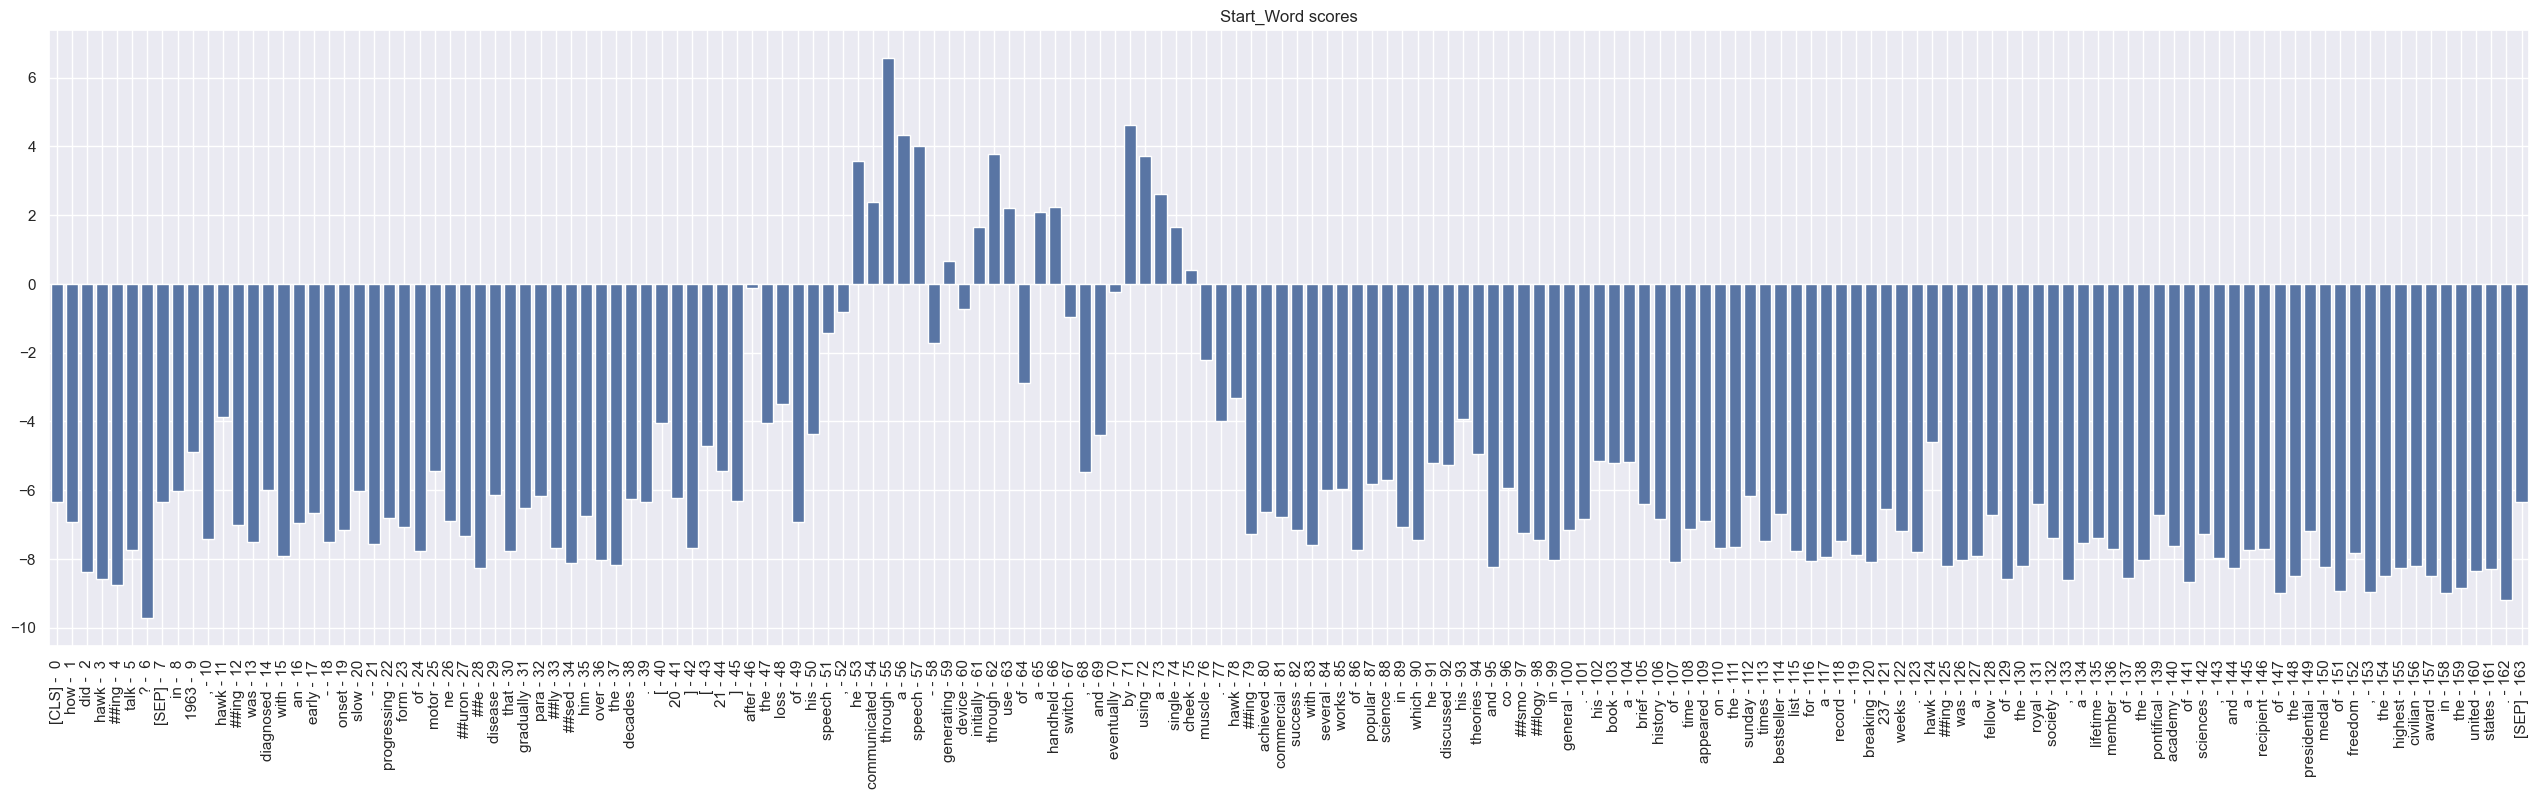

In [39]:
ax = sns.barplot(x=token_labels, y=np.squeeze(s_scores))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title('Start_Word scores')

plt.show()

C:\Users\hille\AppData\Local\Temp\ipykernel_16236\1786569012.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


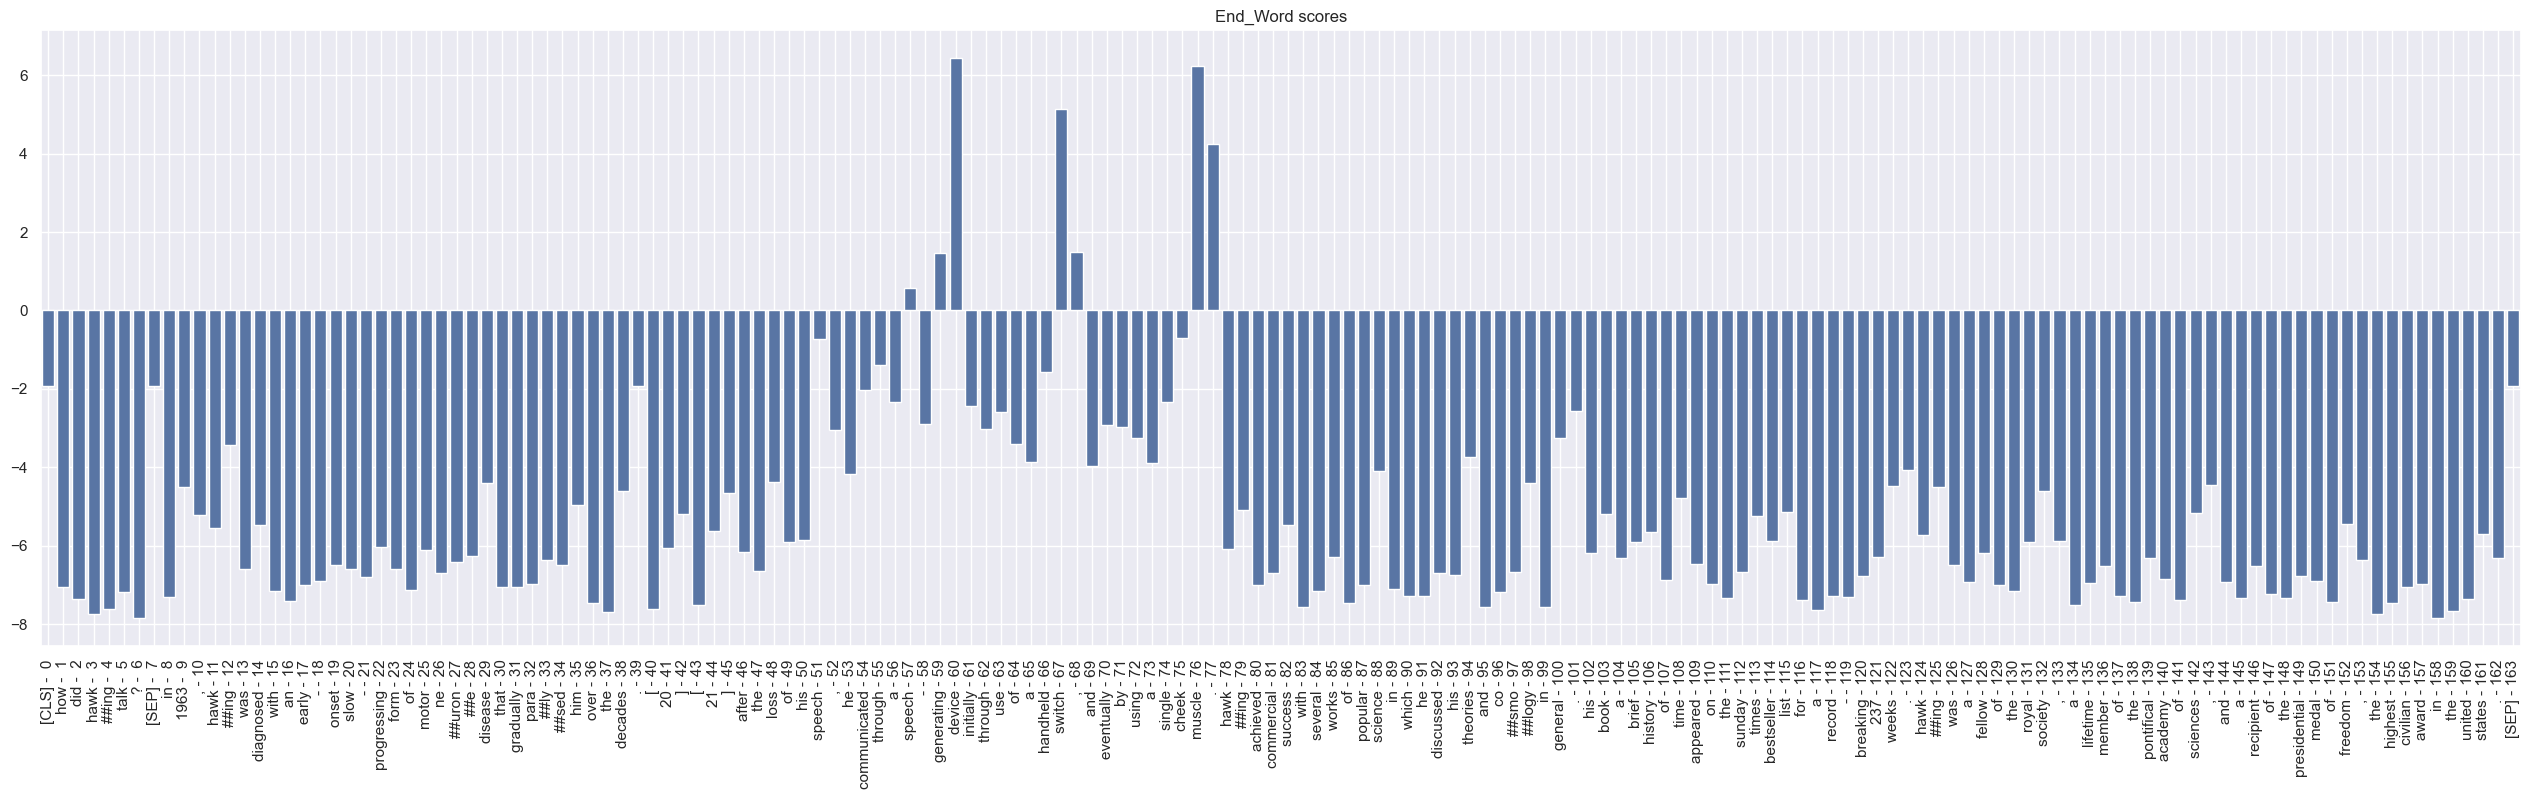

In [40]:
ax = sns.barplot(x=token_labels, y=np.squeeze(e_scores))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title('End_Word scores')

plt.show()